# Descriptive Statistics and the Least Squares Method using Python

*Ventsislav Dimitrov*  
*University of Sofia "St. Klimen Ohridski"*  
*Faculty of Physics, Department of Astronomy*  

In the theory of probability and statistics the concepts of mean and mathematical expectation are often used as synonyms, for the assessment of central tendency in a probability distribution, or in the values of a random variable which is characterized in that distribution. On the other hand, in order to evaluate the noise in the data or deviations of that data from the central average value, we can use statistical estimates by variation, dispersion or standard deviation. When looking for a correlation between variables in an astronomical excerpt or database, we usually resort to the use of the correlation coefficient *r* or to the application of a linear / non-linear regression.

Such statistical evaluations are applied in virtually all areas of science, where astronomy is no exception. The methods described in this project could be used to define the statistical properties of astronomical catalogs or experimentally derived data from an observational program. Of course, most of these formulas are usually implemented in the software that we use to analyze the data, but the aim of the current project is to show the possible implementations of these methods in Python using *lists*, *conditional blocks*, *iteration*, *reading and writing* a file, etc.

## Descriptive Statistics

Writing a program that takes tabular data from a file and calculates the following statistical estimates:

* Generalized mean:

$$ \bar{x}(m) = \left(\frac{1}{n} \sum_{i=1}^{n}{x_i^m}\right)^{\frac{1}{m}} $$

Here *m* is the exponent that shows what type of mean we will calculate:

*m = 1* - arithmetic  
*m = 2* - quadratic  
*m = -1* - harmonic  

* Variance:

$$ \sigma_x^2 = \frac{1}{n-1} \sum_{i=1}^{n}{(x_i - \bar{x})^2} $$

* Covariance:

$$ Cov(x,y) = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y}) } $$

To start off, we need to import some modules into Python for our calculations to work:

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Now we have to define our own functions for the formulas mentioned above:

In [5]:
def genMean(x, m):

    """ Calculation of a generalized mean """

    S = 0

    for value in x:
        mean = value**m
        S += mean

    mean_x = (1./len(x) * S)**(1./m)

    return mean_x

################################

def residual(x):
    
    """ Calculate the residual (x_i - mean_x) """
    
    res = []
    
    for value in x:
        res.append(value - mean_x)
    
    return res

################################

def variance(x):
    
    """ Calculate the variance of x """

    S = 0

    for value in x:
        sigma = (value - mean_x)**2
        S += sigma

    var = (1./(len(x)-1)) * S

    return var

################################

def covariance(x, y):
    
    """ Calculate the covariance of x """
    
    if len(x) != len(y):
        print "X and Y arrays MUST have equal lenght!"
        return
    
    n = len(x)
    
#    x_bar = mySum(x)/n
#    y_bar = mySum(y)/n

    S = 0
    
    res_x = residual(x)
    res_y = residual(y)
    
    for i in range(n):
        S += res_x[i] * res_y[i]
    
    return (1./(n-1)) * S

Now we unpack the data file using NumPy:

In [8]:
M, Merr, V = np.loadtxt("Data/velocity_luminosity.txt", usecols=(1, 2, 3), unpack=True, skiprows=1)

Then we ask the user for input (the type of mean):

In [10]:
m = raw_input("Mean type? \n 1: arritmetic \n 2: quadratic \n -1: harmonic \n")
m = int(m)

Mean type? 
 1: arritmetic 
 2: quadratic 
 -1: harmonic 
1



And we calculate *mean*, *variance* and *covariance*:

In [11]:
print "Generalized mean of M:", genMean(M, m)

print "Variance of M:", variance(M)

print "Covariance of M and V:", covariance(M, V)

Generalized mean of M: -20.4133333333
Variance of M:

NameError: global name 'mean_x' is not defined

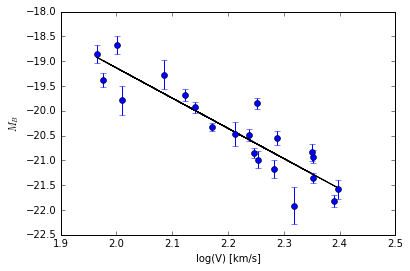

In [12]:
M, Merr, V = np.loadtxt("Data/velocity_luminosity.txt", usecols=(1, 2, 3), unpack=True, skiprows=1)

logV = np.log10(V)

# Unpack values for the linear regression fit:
slope, intercept, r_value, p_value, slope_stg_error = stats.linregress(logV, M)

# Calculate linear regression fit:
predict_M = intercept + slope * logV
pred_error = M - predict_M
degrees_of_freedom = len(logV) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

# Plot results:
plt.scatter(logV, M)
plt.plot(logV, predict_M, "k-")
plt.errorbar(logV, M, yerr=Merr, fmt='o') # Show error bars
plt.xlabel("log(V) [km/s]")
plt.ylabel("$M_{B}$")